<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_5_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,68.818321,2.006185,174.598262,172.584456,2.013805
1,0.0,1.0,31.139984,40.313758,-0.586546,80.867196,81.261037,-0.393842
2,0.0,2.0,70.668177,70.207028,0.721576,151.596781,150.850796,0.745985
3,0.0,3.0,54.323744,89.328550,0.515434,154.167728,153.694467,0.473261
4,0.0,4.0,94.833967,36.421622,-0.580967,140.674622,141.108888,-0.434266
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.847897,69.039561,0.691490,158.578948,157.953968,0.624980
119996,999.0,116.0,79.463199,93.662634,-0.095101,183.030731,183.196907,-0.166176
119997,999.0,117.0,69.735112,89.404665,1.130951,170.270728,169.188255,1.082473
119998,999.0,118.0,44.410224,95.028284,0.698921,150.137429,149.430313,0.707117


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,68.818321,2.006185,174.598262,172.584456,2.013805
1,0.0,1.0,31.139984,40.313758,-0.586546,80.867196,81.261037,-0.393842
2,0.0,2.0,70.668177,70.207028,0.721576,151.596781,150.850796,0.745985
3,0.0,3.0,54.323744,89.328550,0.515434,154.167728,153.694467,0.473261
4,0.0,4.0,94.833967,36.421622,-0.580967,140.674622,141.108888,-0.434266
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.847897,69.039561,0.691490,158.578948,157.953968,0.624980
119996,999.0,116.0,79.463199,93.662634,-0.095101,183.030731,183.196907,-0.166176
119997,999.0,117.0,69.735112,89.404665,1.130951,170.270728,169.188255,1.082473
119998,999.0,118.0,44.410224,95.028284,0.698921,150.137429,149.430313,0.707117


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,68.818321,2.006185,174.598262,172.584456,2.013805
1,0.0,1.0,31.139984,40.313758,-0.586546,80.867196,81.261037,-0.393842
2,0.0,2.0,70.668177,70.207028,0.721576,151.596781,150.850796,0.745985
3,0.0,3.0,54.323744,89.328550,0.515434,154.167728,153.694467,0.473261
4,0.0,4.0,94.833967,36.421622,-0.580967,140.674622,141.108888,-0.434266
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.847897,69.039561,0.691490,158.578948,157.953968,0.624980
119996,999.0,116.0,79.463199,93.662634,-0.095101,183.030731,183.196907,-0.166176
119997,999.0,117.0,69.735112,89.404665,1.130951,170.270728,169.188255,1.082473
119998,999.0,118.0,44.410224,95.028284,0.698921,150.137429,149.430313,0.707117


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

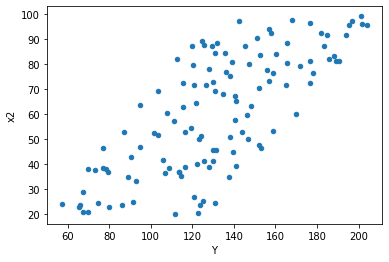

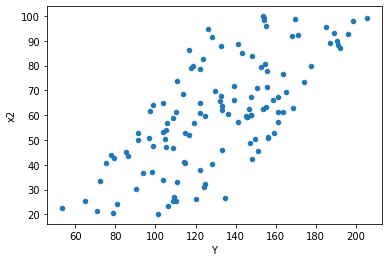

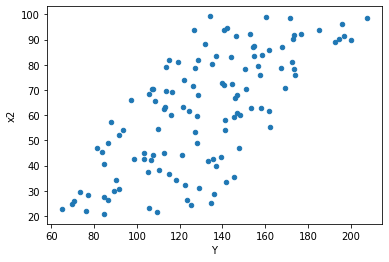

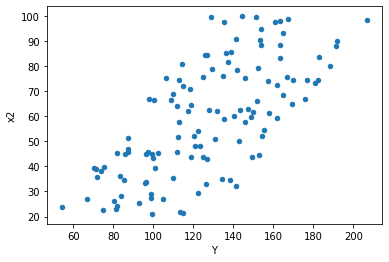

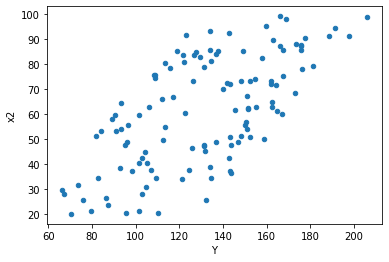

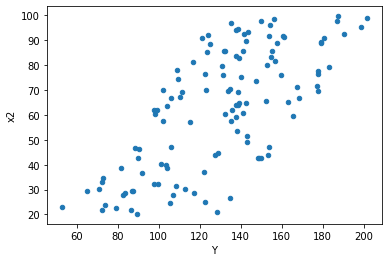

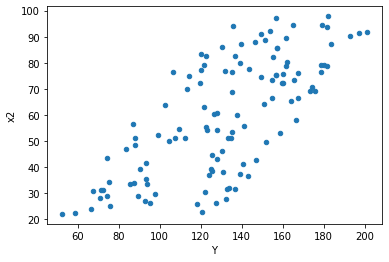

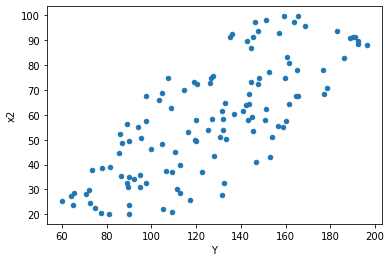

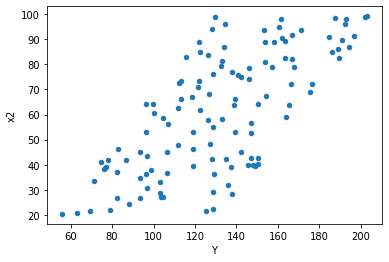

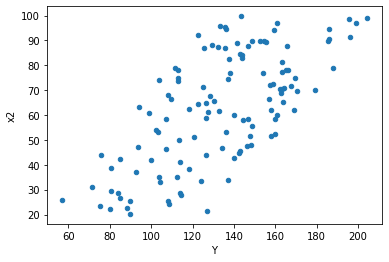

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,46.0,46.0,20.025876464104662,20.89880846093636,0.4353451405240144,0.4543219230638339,1.0435902018269403,0.8855787611212718,0.5572106194393641,0.4427893805606359,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,21.10024654508677,26.74533706602066,0.45870101184971235,0.5814203710004492,1.2675367090555805,0.42447802596393935,0.7877609870180303,0.21223901298196968,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,22.213955275986663,28.082833297459807,0.4829120712171014,0.6104963760317349,1.2641977958701218,0.4296382540649397,0.7851808729675301,0.21481912703246986,Reject005=1 : Homoscedasticity
12.0,46.0,46.0,18.456925674066724,19.501196283795906,0.40123751465362445,0.4239390496477371,1.0565787947662624,0.8527478876517478,0.5736260561741261,0.4263739438258739,Reject005=1 : Homoscedasticity
15.0,46.0,46.0,19.445931623970637,21.56613690707884,0.42273764399936165,0.46882906319736606,1.109030789787138,0.72711908385683,0.636440458071585,0.363559541928415,Reject005=1 : Homoscedasticity
20.0,46.0,46.0,17.571789579398207,18.640114419957094,0.38199542563909145,0.4052198786947194,1.060797725566406,0.8422224508237299,0.578888774588135,0.42111122541186496,Reject005=1 : Homoscedasticity
21.0,46.0,46.0,24.289269235587014,30.810774680990164,0.5280275920779786,0.6697994495867426,1.2684932750404971,0.42300893784471283,0.7884955310776436,0.21150446892235641,Reject005=1 : Homoscedasticity
22.0,46.0,46.0,16.369701542719643,16.946116946972076,0.3558630770156444,0.368393846673306,1.0352123343695776,0.9070838189026822,0.5464580905486589,0.4535419094513411,Reject005=1 : Homoscedasticity
26.0,46.0,46.0,16.890221103737396,21.48531661854826,0.36717871964646515,0.46707210040322306,1.272056563770742,0.417572658743554,0.791213670628223,0.208786329371777,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,23.58007467982985,17.667997248372863,0.5126103191267358,0.3840868967037579,0.7492765603276857,0.331114088786732,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,20.025876464104662,20.89880846093636,0.4353451405240144,0.4543219230638339,1.0435902018269403,0.8855787611212718,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,21.10024654508677,26.74533706602066,0.45870101184971235,0.5814203710004492,1.2675367090555805,0.42447802596393935,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,27.832425753946417,23.7955882797353,0.6050527337814439,0.51729539738555,0.8549591936434529,0.5973242603314355,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,28.67970206181937,21.933945175399177,0.623471783952595,0.4768248951173734,0.7647898547941799,0.36648094259071107,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,22.213955275986663,28.082833297459807,0.4829120712171014,0.6104963760317349,1.2641977958701218,0.4296382540649397,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,20.99609960682879,16.989806608741244,0.4564369479745389,0.3693436219291575,0.8091887029920294,0.47557643340121303,Reject005=1 : Homoscedasticity
7.0,46.0,46.0,25.152421179091935,19.394212473695628,0.5467917647628682,0.4216133146455571,0.7710674187428587,0.38123019552950865,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,25.950916643329563,24.088866225967312,0.5641503618115122,0.5236710049123329,0.9282472198206196,0.8017373255764049,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      946
Reject005=0 : Heteroscedasticity     54
Name: Result_test, dtype: int64